In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [2]:
true_data = pd.read_csv("csv_data/srilanka.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,3382,3233,13
1,3388,3245,13
2,3395,3254,13
3,3402,3258,13
4,3513,3259,13
...,...,...,...
334,440302,0,9185
335,444130,0,9400
336,447757,0,9604
337,451401,0,9806


In [3]:
smoothed_data = pd.read_csv("../C++/build/release/results/srilanka_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
smoothed_data

FileNotFoundError: [Errno 2] No such file or directory: '../C++/build/release/results/srilanka_popsmooth.txt'

<IPython.core.display.Javascript object>


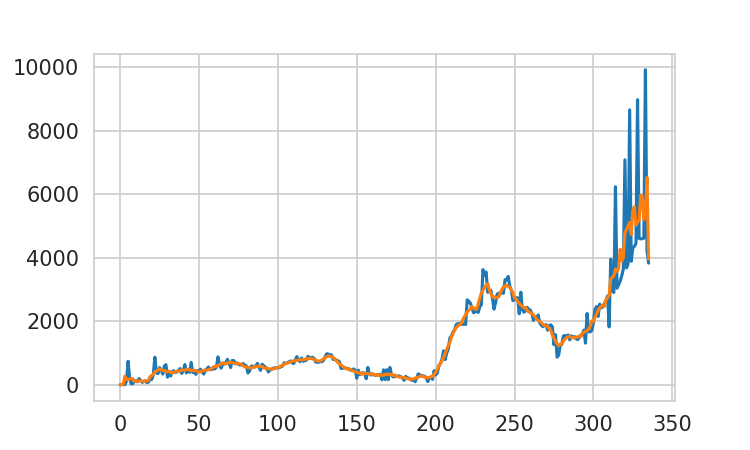

In [18]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

<IPython.core.display.Javascript object>


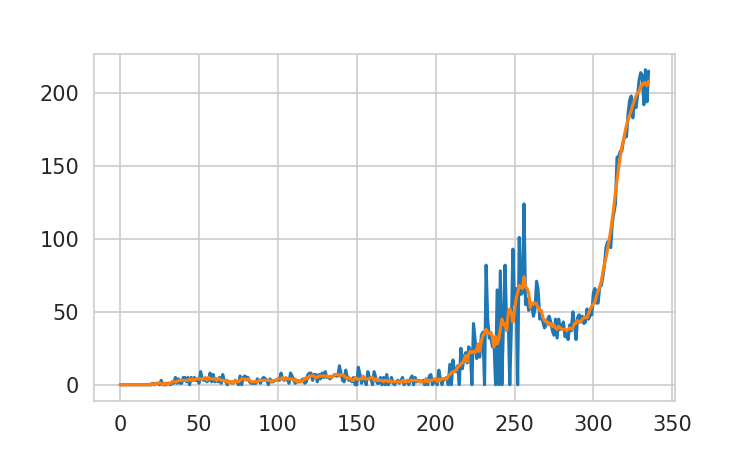

In [19]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

In [52]:
pred_data = pd.read_csv("../C++/build/release/results/srilanka_prediction_seed1.txt", \
                        skipinitialspace=True)
print(pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/srilanka_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
# print(param_data)

beta = param_data.loc[0:num_days-1]
c0 = param_data.loc[  num_days:2*num_days-1]
c1 = param_data.loc[2*num_days:3*num_days-1]
c2 = param_data.loc[3*num_days:4*num_days-1]
c3 = param_data.loc[4*num_days:5*num_days-1]
IFR = param_data.loc[5*num_days:6*num_days-1]
# print(IFR)

num_sol_to_plot = min(10, len(param_data.columns));

error = param_data.loc[param_data.index[-1]]
error_plot = error[0:num_sol_to_plot]
print(error)

scaled_error = (np.log(error_plot) - np.log(min(error_plot))) / (np.log(max(error_plot)) - np.log(min(error_plot))) * 0.9
print(scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

# grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
grey_colors[0] = [0.24, 0.63, 0.93]
print(grey_colors)
# plt.figure()
# ax = sns.heatmap(np.random.rand(30,30))
# ax.pcolor(np.random.rand(30,30),cmap=grey_colormap)
# plt.show()

start_date = datetime.strptime("2020-10-1", "%Y-%m-%d")
dates = [];
for i in range(0,num_days):
    dates.append(start_date + timedelta(days=i))

locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

        TotalR0       TotalU0  RecoveredR0     FatalR0     InfectedU0  \
0      3382.000  0.000000e+00     3233.000    13.00000       0.000000   
1      3382.307  2.906193e+01     3250.118    13.00046       5.795201   
2      3383.221  5.399579e+01     3265.269    13.00346      17.818640   
3      3384.865  7.981372e+01     3278.717    13.01068      31.858960   
4      3387.306  1.099196e+02     3290.731    13.02306      47.163570   
..          ...           ...          ...         ...            ...   
331  422157.200  1.383044e+06   378401.700  8561.15400  182471.400000   
332  427511.400  1.411710e+06   383025.900  8778.51900  184053.500000   
333  432910.900  1.440571e+06   387715.400  8999.55300  185613.400000   
334  438355.100  1.469624e+06   392466.900  9224.15700  187150.300000   
335  443843.200  1.498863e+06   397277.800  9452.23800  188662.800000   

      RecoveredU0    FatalU0     Reff0     TotalR1       TotalU1  ...  \
0    0.000000e+00   0.000000  4.308403    3382.000

<IPython.core.display.Javascript object>


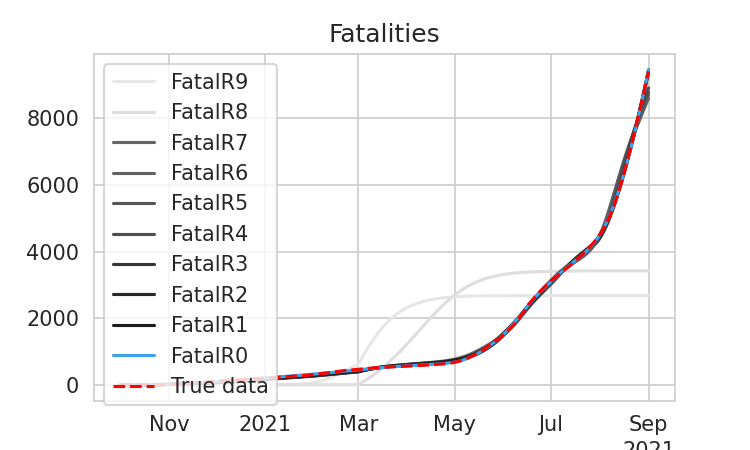

In [64]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))

fig = plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates,pred_fatal["FatalR"+str(i)], color=grey_colors[i])
    
plt.plot(dates,smoothed_data["deaths_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
    
labels = pred_fatal.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Fatalities')
plt.show()


<IPython.core.display.Javascript object>


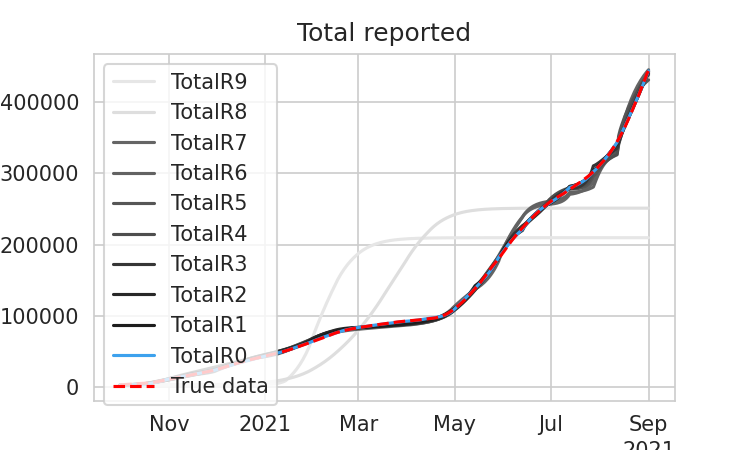

In [60]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
# print(pred_reported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_reported["TotalR"+str(i)], color=grey_colors[i])

# plt.plot(pred_reported)
plt.plot(dates, smoothed_data["confirmed_smooth"],'r--')
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_reported.columns[0:num_sol_to_plot][::-1].tolist();
labels.append("True data");
plt.legend(labels,loc='upper left')
plt.title('Total reported')
plt.show()

<IPython.core.display.Javascript object>


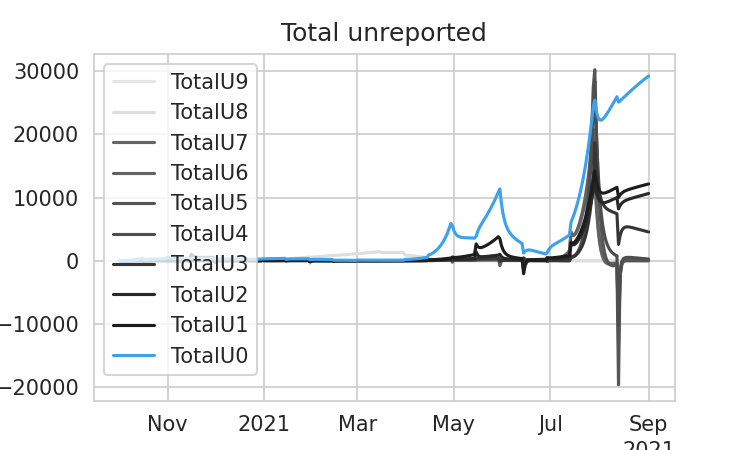

In [58]:
pred_unreported = pred_data.filter(regex=("TotalU.*"))
# print(pred_unreported)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_unreported["TotalU"+str(i)].diff(), color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_unreported.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Total unreported')
plt.show()

        Reff0     Reff1     Reff2     Reff3     Reff4     Reff5     Reff6  \
0    4.308403  2.629010  2.221517  2.232013  2.396144  1.682944  1.785911   
1    4.308402  2.629008  2.221515  2.232011  2.396142  1.682942  1.785908   
2    4.308397  2.629005  2.221512  2.232007  2.396138  1.682939  1.785905   
3    4.308389  2.628999  2.221506  2.232003  2.396133  1.682934  1.785900   
4    4.308378  2.628993  2.221500  2.231997  2.396127  1.682929  1.785895   
..        ...       ...       ...       ...       ...       ...       ...   
331  1.076700  1.054164  1.065642  0.891761  0.637053  0.748340  0.783733   
332  1.074773  1.053255  1.064807  0.891370  0.636959  0.748274  0.783646   
333  1.072834  1.052341  1.063966  0.890984  0.636870  0.748214  0.783564   
334  1.070882  1.051421  1.063121  0.890604  0.636788  0.748157  0.783488   
335  1.068918  1.050498  1.062269  0.890229  0.636711  0.748105  0.783417   

        Reff7     Reff8     Reff9    Reff10    Reff11    Reff12    Reff13  

<IPython.core.display.Javascript object>


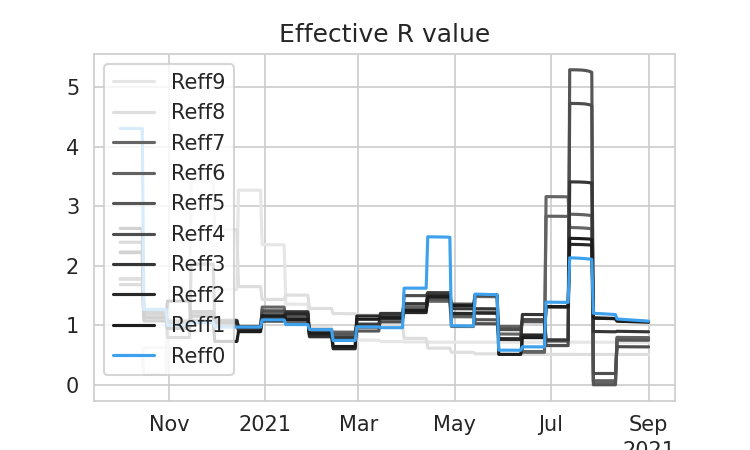

In [55]:
pred_Reff = pred_data.filter(regex=("Reff.*"))
print(pred_Reff)

plt.figure()

for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, pred_Reff["Reff"+str(i)], color=grey_colors[i])

ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

labels = pred_Reff.columns[0:num_sol_to_plot][::-1].tolist();
plt.legend(labels,loc='upper left')
plt.title('Effective R value')
plt.show()

<IPython.core.display.Javascript object>


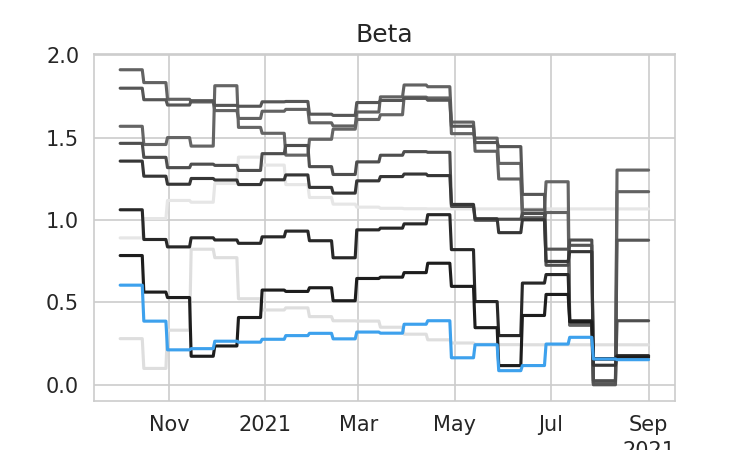

<IPython.core.display.Javascript object>


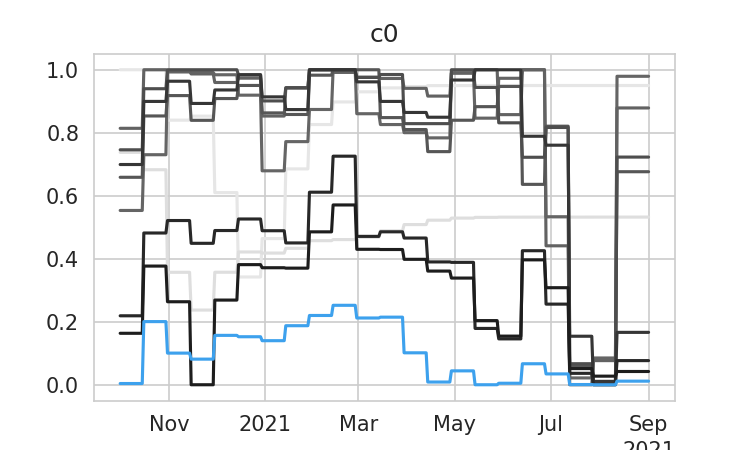

<IPython.core.display.Javascript object>


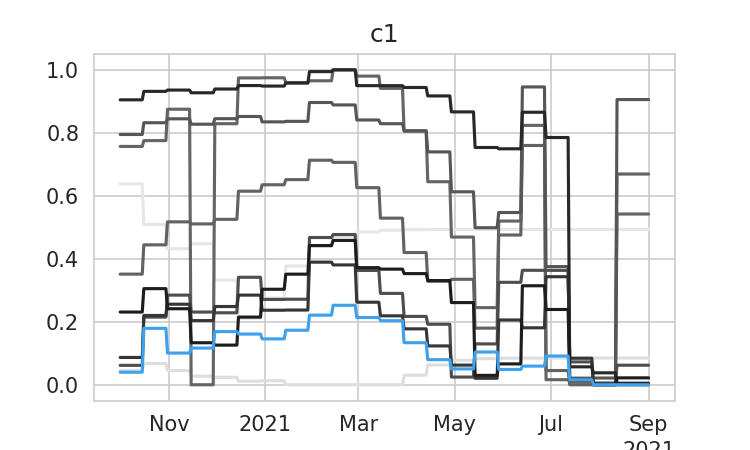

In [62]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, beta[i], color=grey_colors[i])
# sns.lineplot(data=beta,palette=grey_colormap, dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('Beta')
plt.show()

plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, c0[i], color=grey_colors[i])
# sns.lineplot(data=c0,palette="Greys_r", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('c0')
plt.show()

plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, c1[i], color=grey_colors[i])
# sns.lineplot(data=c1,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('c1')
plt.show()

# print(sns.color_palette("light:#5A9")[0])

<IPython.core.display.Javascript object>


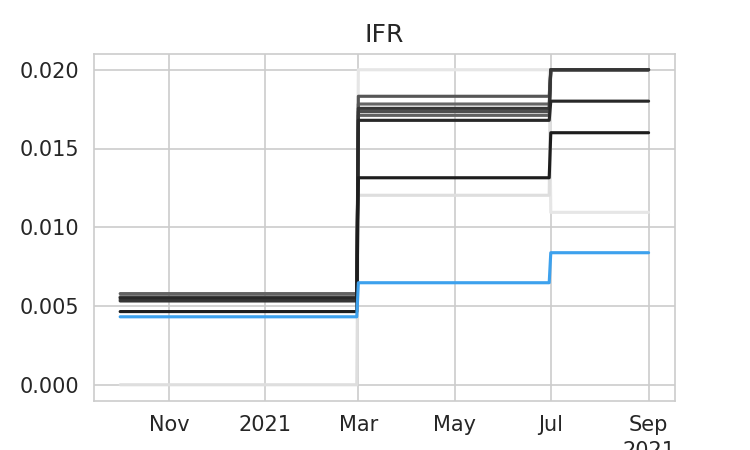

In [63]:
plt.figure()
for i in range(num_sol_to_plot-1,-1,-1):
    plt.plot(dates, IFR[i], color=grey_colors[i])
# sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.title('IFR')
plt.show()